# Question 1:

Firstly, I made 11 .txt, with greater than 100 english words, I saved these .txt files in the same working directory as my python code. I opened each file from the current working directory and read each file to check I had got the correct document. To ensure I had different length of lists, each text file had a unique number of words.

In [1]:

import os
##get working directory
working_directory = os.getcwd()

file_path = working_directory + '\\text_docs' 
path = file_path
allLines = []
fileList = os.listdir(path)
file_path = working_directory + '\\text_docs\\' 
#select and text fles in working directory
for i in fileList:
    if i != ".ipynb_checkpoints":
        file = open(os.path.join(file_path + i), 'r')
        allLines.append(file.read())

I wrote a function which recorded the location of each text files as a string and collated this into a list.

In [2]:
# convert text files into string list
def files_in(*dirs):
    dir = os.path.join(*dirs)
    files = os.listdir(dir)
    return [os.path.join(dir, f) for f in files]

List_of_files = files_in(file_path)
List_of_files = List_of_files[1:]

I imported a module to tokenise a text document. I read each text document and converted it into a list of tokens.

In [3]:
# tokenise text documents int NTLK format

import nltk
docs=[]
for i in List_of_files:
    f = open(i)
    text = f.read()
    f.close()
    docs.append(text)


import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

bags=[]
for doc in docs:
    bags.append(word_tokenize(doc))
    

C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
C:\Users\Toshiba\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://num

I imported a module to count the number of occurances for each token in the list previously created.

In [4]:
#Count number of occurances
from collections import Counter
def num_of_occurances(list1):
    collection = dict(Counter(list1))
    return collection

# collect results in a list
result = []
for i in range(0,len(bags),1):
     result.append(num_of_occurances(bags[i]))


I wrote a function to calculate Jaccard similarity from a list of tokens, to do this I had to write a function which calculaed the total number of unique items in a dictionary, as well as summing the total number of times tokens from a set of 2 lists were identical. I then calculated the jaccard similarity between the first 2 text documents in my file list and got a value of 0.225(3sf).

In [5]:
#jaccards function
def maketotal(dict1):
    total= 0
    for items in dict1:
        total += dict1[items]
    return total


def jaccard1(dict1,dict2):
    intersection = {}
    for items in dict1.keys():
        if items in dict2.keys():
            intersection[items]=min(dict1[items],dict2[items])
            
    intersectiontot = maketotal(intersection)
    union = maketotal(dict1) + maketotal(dict2) - intersectiontot
    return intersectiontot / union

bag_list = []
for i in range(0,11,1):
    bag_list.append(num_of_occurances(bags[i]))
    
jaccard1(bag_list[0],bag_list[1])


I imported a time module and numpy library. I wrote a function to estimate the time taken for a function to run on my computer, the function reapeted a set number of times, to improve the reliability of the results, the function calulated the mean and standard deviation over a set number of repeats.

With this function, I calculated the time taken to run the jaccard function I had previously written, I chose the independant variable as the maximum value from the number of tokens between two list. I justified this as the jaccard function would have to search through every element in one list to see if it occured in the other list. I calculated the mean, standard deviation and standard error.

In [38]:
import time
import numpy as np
import sys
# function to compute time taken to run a function
# Reapeats == 1000 to reduce compute time, for better reliability use repeats = 10,000
def timeit(somefunc,*args,repeats=1000,):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)

result = []
max_len = []
max_size = []
mean = []
sd = []
se = []

# Results of time taken to compute function on a variety of sets,
length = len(bag_list)-1
for i in range(0,length,1):
    result.append(timeit(jaccard1,bag_list[i],bag_list[i+1]))
    max_len.append(max(len(bag_list[i]),len(bag_list[i+1])))
    max_size.append(sys.getsizeof(num_of_occurances(bags[i])))
    mean.append(result[i][0])
    sd.append(result[i][1])
    se.append(sd[i]/np.sqrt(max_len[i]))


Theoretically the worst case running time for the jaccard function would be of O(n^2). This is because you have to check if each item(one for loop) in the list, occurs in another list(second for loop in the worst case scenario).

I plotted results of mean time to compute aganst length of the largest list in the set, importing the matplotlib module, I plotted points via a scatter plot and add a trendline, I also added error bars using the standard error, since I was calculating the mean value.

(-0.00025, 0.0005)

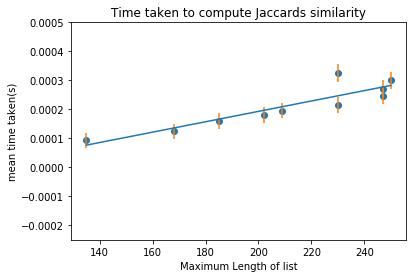

In [9]:
import matplotlib.pyplot as plt

#function to plot a straight line graph
def straight_line_plot(x,y):
     fig = plt.figure()
#find line of best fit
     a, b = np.polyfit(x, y, 1)

#add points to plot
     plt.scatter(x, y)

#add line of best fit to plot
     plt.plot(x, a*x+b)  
     plt.errorbar(x, y, yerr=np.array(se), label='both limits (default)', ls = "none")
     #plt.legend(loc='lower right')


straight_line_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of list')
plt.ylabel('mean time taken(s)')
plt.title("Time taken to compute Jaccards similarity")
plt.ylim(-0.00025,0.0005)

In [10]:
print(np.array(se))
print(np.array(mean))

[2.52754614e-05 2.54129249e-05 2.68688721e-05 2.70147405e-05
 2.74420082e-05 2.71176656e-05 3.09133875e-05 2.74242213e-05
 2.82963053e-05 2.89924395e-05]
[9.29408073e-05 1.23927593e-04 1.58904314e-04 1.79889441e-04
 1.95879459e-04 2.15866327e-04 3.26795816e-04 2.46850252e-04
 2.71829605e-04 3.00814867e-04]


since the error << than the x argument, we can assume the conversion of errors in logaritions as dx/x, were dx is the error.

A stright line plot is not a very suitable plot for the data collected, hence I converted the data with the natural log. Once again error bars using the standard error were added. The gradient of the log log plot will indicate the time complexity of the jaccard function for my computer.(rules of logs mean exponent of function in log can be moved to multiple (log(a^b) = blog(a)))

Text(0.5, 1.0, 'Time taken to compute Jaccards similarity - log')

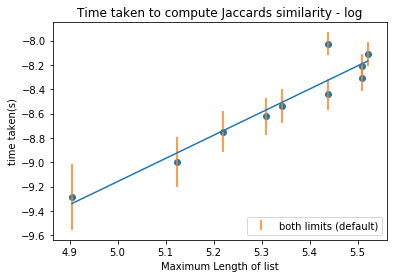

In [11]:
x = np.array(max_len)
y = np.array(mean)
# function to plot a log log graph
def straight_line_log_log_plot(x,y):
    xlog = np.log(x)
    ylog = np.log(y)
    z = se/y

#find line of best fit
    a, b = np.polyfit(xlog, ylog, 1)
#add points to plot
    plt.scatter(xlog, ylog)

#add line of best fit to plot
    plt.plot(xlog, a*xlog+b) 
    plt.errorbar(xlog, ylog, yerr=np.array(z), label='both limits (default)',ls='none')
    plt.legend(loc='lower right')

straight_line_log_log_plot(x,y)
plt.xlabel('Maximum Length of list')
plt.ylabel('time taken(s)')
plt.title("Time taken to compute Jaccards similarity - log")

I wrote a function to calculate the gradient and the intercept of the log log plot

In [12]:
import math
from scipy import stats
import numpy
# function to calculate gradeint and intercept of straight line on log log graph
def grad_interpect_log_log(x,y):
    x = numpy.log10(x)
    y = numpy.log10(y)

    gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    print ("Gradient and intercept", gradient, intercept)
grad_interpect_log_log(np.array(max_len),np.array(mean))

Gradient and intercept 1.9003434837170643 -8.103965151284234


A gradient of 1.90(3sf), is close to the theoritcal worst case running time

### Summary Q1:
To improve the analysis, I could have used more than 11 text documents, with a greater variety of the the number of words in each document, I could also have tested a greater range of possible sets, however for this analysis, I think  what I have show is sufficent. For converting errors on a log graph the error values are only 10 times less than the function output, and ideally this magnitude would be 100 times larger.

# Question 2:
To convert from a spare representation to a dense representation, I wrote a function which took a list of dictionaries and outputed a matrix representation of the word document.

In [13]:
def make_matrix(list_of_dicts):
    #first of all make a list of all of the features that occur in any document - these will be the dimensions of the matrix
    allfeatures={}    
    for docdict in list_of_dicts:
        for feat in docdict.keys():
            allfeatures[feat]=1
    
    dimensions=list(allfeatures.keys())
    #don't strictly need to sort it - but it is good practise to make sure it is reproducible
    sorted(dimensions)
    
    matrix=[]
    #each row in the matrix will be one of the dimensions
    for dimension in dimensions:
        row=[]
        #look up the appropriate value for each document
        for docdict in list_of_dicts:
            row.append(docdict.get(dimension,0)) #this will append the document's value if present, 0 otherwise
        matrix.append(row)
        
        
    return matrix

## it might be useful to be able to transpose a matrix so we can compare documents
def transpose(matrix):
    transposed=[]
    for i in range(0,len(matrix[0])):
        transposed.append([row[i] for row in matrix])
        
    return transposed

#call make_matrix on whatever variable holds your list of dictionaries representation of your documents


amatrix=make_matrix(bag_list)




I wrote a function to calculate the cosine similarity between 2 documents in a dense representation. I also wrote a function to calculate cosine similarity using inbuilt features in the numpy library. To optimise the function, I checked wheter a zero value was being used and if so, reduced the total number of calculations using an if statement.

In [15]:
import math
import numpy as np

# calculute cosine similiarity from dense representation
def naiveCosine(a, b):
    num = 0
    d1 = 0
    d2 = 0
    for i in range(0,len(a)):
        if a[i] != 0 and b[i] != 0:
            num += a[i]*b[i]
        if a[i] != 0:
            d1 += a[i]*a[i]
        if b[i] != 0:
            d2 += b[i]*b[i]
    
    return (num) / (np.sqrt(d1*d2))




docvectors=transpose(amatrix)

vectors = []
for i in range(0,len(docvectors),1):
    vectors.append(np.array(docvectors[i]))
    
from numpy.linalg import norm 
# calculute cosine similiarity from dense representation, using inbuilt numpy library
def npcosine(a, b):
    cosine = np.dot(a,b)/(norm(a)*norm(b))
    return(cosine)

Using the timeit function previously created, I calculated the time taken to calculate the cosine similiarity, using my function and the function written with numpy libraries. The length of each matrix is always going to be the same length, due to the fact that to create the matrix, I had to find representations for every single feature of NLTK in the document, hence the length of each list was the same. However the number of zeros did vary for each represenation, so I choose my length as the maximum value in a set of the number of non zero elements, since calculating with a zero is trivial and reduces the time complexity in the calculation of the cosine function. 

In [16]:

result = []
max_len = []
mean = []
sd = []
se = []

length = len(vectors) - 1
# Results of time taken to compute function on a variety of sets,
for i in range(0,length,1):
    
    result.append(timeit(naiveCosine,vectors[i],vectors[i+1]))
    max_len.append(max(np.count_nonzero(vectors[i]),np.count_nonzero(vectors[i+1])))
    mean.append(result[i][0])
    sd.append(result[i][1])
    se.append(sd[i]/np.sqrt(max_len[i]))

For the naiveCosine function, since there is one for loop, the running time would be in the worst case scenario of O(n)

I plotted results of mean time to compute aganst length of the largest list in the set, importing the matplotlib module, I plotted point via a scatter plot and add a trendline, I also added error bars using the standard error, since I was calculating the mean value of a set number of reapeted operation.

(-0.001, 0.002)

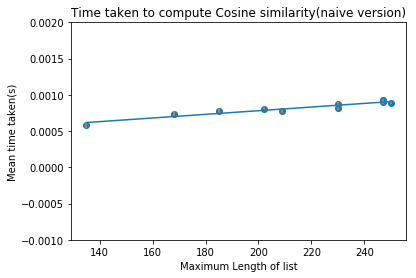

In [17]:
#plot straight line using function previously defined
straight_line_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of list')
plt.ylabel('Mean time taken(s)')
plt.title("Time taken to compute Cosine similarity(naive version)")
plt.ylim(-0.001,0.002)

In [18]:
print(np.array(se))
print(np.array(mean))

[4.32296012e-05 3.86849897e-05 3.20742256e-05 2.82659260e-05
 2.87755394e-05 2.63615594e-05 2.47957854e-05 2.00672321e-05
 1.73239353e-05 2.14454941e-05]
[0.00058564 0.00073255 0.00077052 0.00080351 0.00077652 0.0008125
 0.00087946 0.00089745 0.00092343 0.00089045]


error values < output values

A stright line plot is not a very suitable plot for the data collected, hence I converted the data with the natural log. Once again error bars using the standard error were added. The gradient of the log log plot will indicate the time complexity of the naiveCosine function for my computer.

Text(0.5, 1.0, 'Time taken to compute Cosine similarity(naive version) log-log plot')

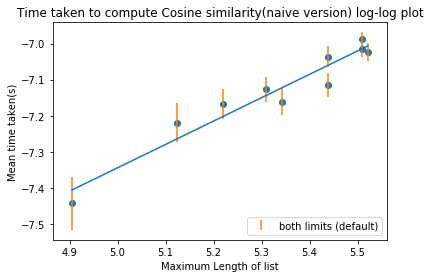

In [19]:
#plot straight line log loggraph using function previously defined
straight_line_log_log_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of list')
plt.ylabel('Mean time taken(s)')
plt.title("Time taken to compute Cosine similarity(naive version) log-log plot")

In [20]:
#Calculate gradient of straight line on log log graph using function previously defined
grad_interpect_log_log(np.array(max_len),np.array(mean))

Gradient and intercept 0.6476070116258333 -4.595894711091809


I got a value of approx 0.648(3sf) for my computer, which is less than the theorical worse case of 1, this may be due to the fact I optimised the code to negative calculation of zeros

I also tested the cosine similarity, using the function written using numpy libraries.

In [32]:
def timeit2(somefunc,*args,repeats=100000,):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)
result = []
max_len = []
mean = []
sd = []
se = []
# Results of time taken to compute function on a variety of sets,
for i in range(0,len(vectors)-1,1):
    
    result.append(timeit2(npcosine,vectors[i],vectors[i+1]))
    max_len.append(max(np.count_nonzero(vectors[i]),np.count_nonzero(vectors[i+1])))
    mean.append(result[i][0])
    sd.append(result[i][1])
    se.append(sd[i]/np.sqrt(max_len[i]))

I plotted the results of time taken for the function aganst lenght of the non zero values of the list.

(-0.00025, 0.0005)

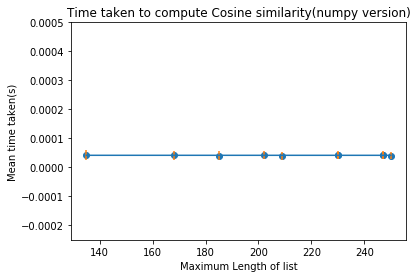

In [33]:
#plot straight line using function previously defined
straight_line_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of list')
plt.ylabel('Mean time taken(s)')
plt.title("Time taken to compute Cosine similarity(numpy version)")
plt.ylim(-0.00025,0.0005)

In [34]:
print(np.array(se))
print(np.array(mean))

[1.72651336e-05 1.54151420e-05 1.45358694e-05 1.39609773e-05
 1.36450157e-05 1.30759792e-05 1.32660459e-05 1.26970834e-05
 1.29006513e-05 1.25024734e-05]
[4.20341468e-05 4.16844106e-05 4.07549310e-05 4.10847664e-05
 4.05850458e-05 4.10347557e-05 4.22041821e-05 4.15743637e-05
 4.25438094e-05 4.07648540e-05]


For this analysis, the errors do not hold for the log log plot since error value ≈ function output value

I converted data into logarithmic format.

Text(0.5, 1.0, 'Time taken to compute Cosine similarity(numpy version) log-log plot')

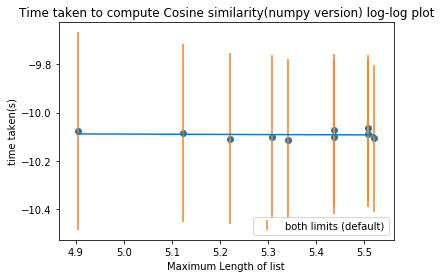

In [35]:
#plot straight line log log plot using function previously defined
straight_line_log_log_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of list')
plt.ylabel('time taken(s)')
plt.title("Time taken to compute Cosine similarity(numpy version) log-log plot")

In [36]:
#Calculate gradient of straight line on log log graph using function previously defined
grad_interpect_log_log(np.array(max_len),np.array(mean))

Gradient and intercept -0.006748967787070594 -4.3671468819379236


The gradient function is approximatly zero, this suggests the number of non zero values is not a good measure to show the running time complexity of this function.

### Summary Q2:
The Cosine Siliarity function, using the numpy library was a lot quicker, as the numpy function only calculates the arithmetic values and doesnt read the list. To improve the analysis, I could have used a greater number of text documents with a greater variety of number of words. I could have also tested a greater variety of sets. However I think my analysis is sufficent. The value of the error and value of the output for the cosine similairtiy using numpy libraries should follow a different ananlysis for taking the log of the error.

# Question 3
I wrote a function to calculate the cosine similarity from a sparse representation, to do this I calculated the numerator as a dot product, if the same words occured in both texts. I calculated the denominator by taking the dot product of both lists and multiplying the two dot products together and then square rooting the result. 

In [37]:
#q3


sumtot = 0
j_tot = 0
i_tot = 0

# function cmputes cosine similiarity from a sparse representation 

def cosinedict(bag_0, bag_1):
    sumtot = 0
    j_tot = 0
    i_tot = 0
    for i in bag_0.keys():
        for j in bag_1.keys():
            if i == j:
                 sumtot += bag_0[i]*bag_1[j]
        i_tot += bag_0[i]*bag_0[i]
    for j in bag_1.keys():
        j_tot += bag_1[j]*bag_1[j]
    cosineS = sumtot/(np.sqrt(j_tot*i_tot))
    return cosineS

I then wrote a function to calculate the time taken to compute the function, as well as mean and standard deviation and standard error

In [39]:

result = []
max_len = []
mean = []
sd = []
se = []

# Results of time taken to compute function on a variety of sets,

for i in range(0,len(bag_list)-1,1):
    
    result.append(timeit(cosinedict,bag_list[i],bag_list[i+1]))
    max_len.append(max(len(bag_list[i]),len(bag_list[i+1])))
    mean.append(result[i][0])
    sd.append(result[i][1])
    se.append(sd[i]/np.sqrt(max_len[i]))

The function I wrote had 3 for loops, so due to this worst case running time for this function would be O(n^3).
I did the same procedude as before, plotting a straight line graph of time aganst length of the maximum list in the set, and took a log-log plot. I calculated the gradient of the log log plot.

(-0.00025, 0.005)

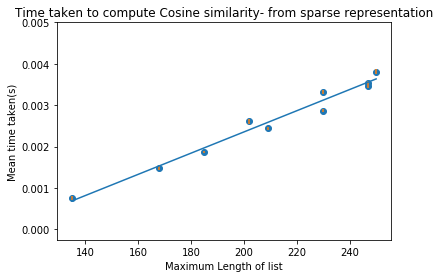

In [40]:
#plot straight line using function previously defined
straight_line_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of list')
plt.ylabel('Mean time taken(s)')
plt.title("Time taken to compute Cosine similarity- from sparse representation")
plt.ylim(-0.00025,0.005)

In [41]:
print(np.array(se))
print(np.array(mean))

[4.33029885e-05 4.40050136e-05 3.27011706e-05 5.37233598e-05
 3.68717306e-05 4.56983492e-05 5.22424542e-05 5.18499400e-05
 4.60975140e-05 6.06504307e-05]
[0.00075753 0.00148209 0.00187285 0.00260939 0.0024395  0.00287123
 0.00331496 0.00346487 0.00354782 0.00381265]


error vaues < than function

Text(0.5, 1.0, 'Time taken to compute Cosine similarity- from sparse representation (log-log plot)')

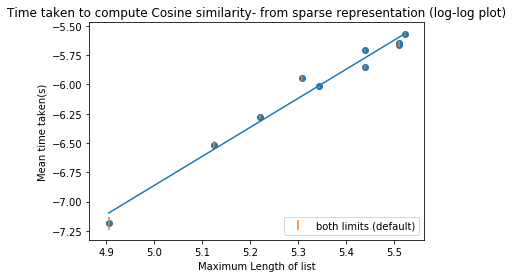

In [42]:
#plot straight line log log  plot using function previously defined
straight_line_log_log_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of list')
plt.ylabel('Mean time taken(s)')
plt.title("Time taken to compute Cosine similarity- from sparse representation (log-log plot)")

In [43]:
#Calculate gradient of straight line on log log graph using function previously defined
grad_interpect_log_log(np.array(max_len),np.array(mean))

Gradient and intercept 2.483469187357597 -8.37289418437188


I got a a value of 2.48 for my gradient, which is smaller than the worse case scenario of 3, this is probably due to the fact the numerator(dot product), in the function is only calculated if there are identical words.

### Summary Q3:
THe running time for calculation of the cosine similiarity using a sparse representation is greater than the running time using a dense representation. I could have used more text documents with a greater variety of total number of words and tested the cosine similairty funciton with a lager variety of sets, however for this project, I think my analysis is sufficent.

# Question 4:
To complete question 4, I created a range of documents with a variety of documents greater than 10, I then wrote a function to compare the jaccard similarity of every single document with each other, using the module itertools to get every single combination and the jaccard function I had created previously. I then timed how long the function took to compute, as well as the length of the number of documents.

In [45]:
#q4

#create new documents with a variety of lengths
bag_list_24 = [x for pair in zip(bag_list,bag_list) for x in pair]
bag_list_48 = [x for pair in zip(bag_list_24,bag_list_24) for x in pair]
bag_list_96 = [x for pair in zip(bag_list_48,bag_list_48) for x in pair]
bag_list_192 = [x for pair in zip(bag_list_96,bag_list_96) for x in pair]
bag_list_384 = [x for pair in zip(bag_list_192,bag_list_192) for x in pair]


#collect all list of documets into a sinngle list
list_of_bags = [bag_list, bag_list_24, bag_list_48, bag_list_96, bag_list_192, bag_list_384]
import itertools

# creat a function to compute jaccards similarity on every combination in the list
def all_pairs_similarity_jaccard(list_of_bags):
    result = []
    for a, b in itertools.combinations(list_of_bags,2):
        result.append(jaccard1(a,b)) 
    return result


    

result = []
max_len = []
mean = []
sd = []
se = []



def timeit3(somefunc,*args,repeats=5,):
    times=[]
    for i in range(repeats):
        starttime=time.time()
        ans=somefunc(*args)
        endtime=time.time()
        timetaken=endtime-starttime
        times.append(timetaken)
    
    mean=np.mean(times)
    stdev=np.std(times)
 
    return (mean,stdev)
###WARNING
#function takes a few mins to run, to reduce compute time reduce reapeats to repeats = 5
# Results of time taken to compute function on a variety of sets,
for i in list_of_bags:
    
    result = (timeit3(all_pairs_similarity_jaccard,i))
    max_len.append(len(i))
    mean.append(result[0])
    sd.append(result[1])
    se.append(result[1]/np.sqrt(len(i)))




I plotted the time taken to compute the all pairs similiariy jaccard function aganst the maximum lenght of documents in the set. I coverted the results into a log log plot, and calculated the gradient and the intercept of the straight log log plot. Since the itertools function is iterating unique sets across the list i.e in a set  (1,2,3,4) you would get {(1,2), (1,3), (1, 4), (2, 3), (2, 4), (3,4)}. A general formula for the total number of combinations is (n!/k!(n-k)!), for us k = 2 so this becomes ((n!/2!(n-2)!), which can be simplified to ((n)*(n-1)/2), hence the time complexity should in the worse case scenario be of O(n^2).

Text(0.5, 1.0, 'Time taken to compute Jaccard similarity on a number of documents in a file')

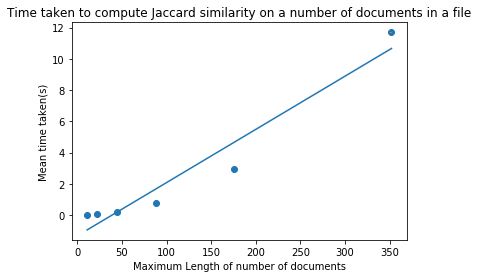

In [46]:
##plot straight line using function previously defined
straight_line_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of number of documents')
plt.ylabel('Mean time taken(s)')
plt.title("Time taken to compute Jaccard similarity on a number of documents in a file")

As we cas see for the plot - the function looks like it is quadratic in nature, we could test this with a quadratic trendline.

Text(0.5, 1.0, 'Time taken to compute Jaccard similarity on a number of documents in a file(log-log plot)')

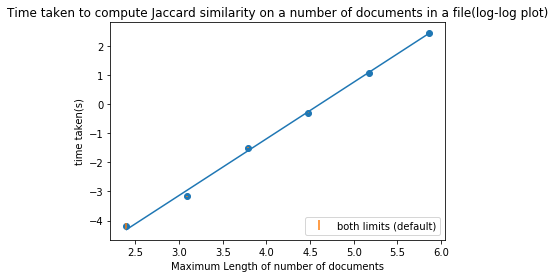

In [47]:
##plot straight line using function previously defined
straight_line_log_log_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of number of documents')
plt.ylabel('time taken(s)')
plt.title("Time taken to compute Jaccard similarity on a number of documents in a file(log-log plot)")

In [48]:
#Calculate gradient of straight line on log log graph using function previously defined
grad_interpect_log_log(np.array(max_len),np.array(mean))

Gradient and intercept 1.9470254050203721 -3.899392532425453


From the calculation of the gradient, and intercept, I can use this to calculate the total time it would take to compute all pairs similarity jaccard function for 200,000 documents. 

In [49]:

y = (np.log(200000)*1.9470254050203721-3.899392532425453)
#rearrange to convet log value to actual value
yt = np.exp(y) 
print(yt)
print(yt/(3600*365))

424380494.7025122
322.9684130156105


to compute 200k documents would take 322 years (3sf).

I did the same process to calculate the cosine similairty on all documents as I had done for the jaccard similarity. Plotting a straight line graph and a log log plot, the calculating the gradiet and itercept of the straight line of the log-log plot. Once again we would expect a time complexity of O(n^2).

In [50]:

# a function to compute cosine similarity on every combination in the list(spare representation)

def all_pairs_similarity_cosine(list_of_bags):
    result = []
    for a, b in itertools.combinations(list_of_bags,2):
        result.append(cosinedict(a,b)) 
    return result

#all_pairs_similarity_cosine(bag_list, 2)

result = []
max_len = []
mean = []
sd = []
se = []

###WARNING
#function takes a few mins to run, to reduce compute time reduce reapeats to repeats = 2
# Results of time taken to compute function on a variety of sets,
for i in list_of_bags:
    
    result = (timeit3(all_pairs_similarity_cosine,i))
    max_len.append(len(i))
    mean.append(result[0])
    sd.append(result[1])
    se.append(result[1]/np.sqrt(len(i)))



I plotted a stright line of the function aganst the the maximum number of documents in a set.

Text(0.5, 1.0, 'Time taken to compute Cosine similarity(naive version) on a number of documents in a file')

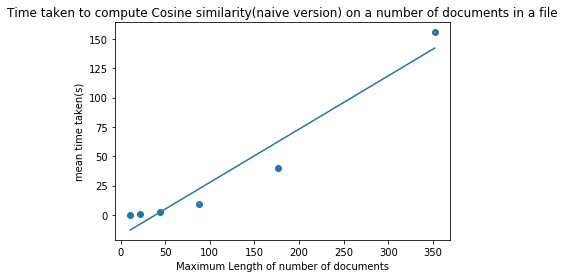

In [51]:
##Calculate gradient of straight line using function previously defined
straight_line_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of number of documents')
plt.ylabel('mean time taken(s)')
plt.title("Time taken to compute Cosine similarity(naive version) on a number of documents in a file")

I also plotted results in a log log plot.

Text(0.5, 1.0, 'Time taken to compute Cosine similarity(naive version) on a number of documents in a file(log-log plot)')

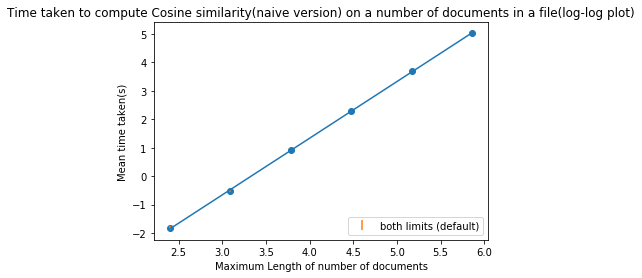

In [52]:
#Calculate gradient of straight line on log log graph using function previously defined
straight_line_log_log_plot(np.array(max_len),np.array(mean))
plt.xlabel('Maximum Length of number of documents')
plt.ylabel('Mean time taken(s)')
plt.title("Time taken to compute Cosine similarity(naive version) on a number of documents in a file(log-log plot)")

In [53]:
#Calculate gradient of straight line on log log graph using function previously defined
grad_interpect_log_log(np.array(max_len),np.array(mean))


Gradient and intercept 1.9930886989131917 -2.883085292516707


From the calculation of the gradient, and intercept, I can use this to calculate the total time it would take to compute all pairs similarity cosine function for 200,000 documents. 

In [54]:
y = np.log(200000)*1.9930886989131917-2.883085292516707
#rearrange to convert log value to actual value
yt = np.exp(y) 
print(yt)
print(yt/3600)
print(yt/(3600*365))

2057382036.387644
571495.010107679
1565.7397537196682


for 200k documents the algorithm would take 1570 years(3sf)

### Summary Q4:
To improve the anaysis, I could have created more documents of a variety of lengths, however the compute time was very long, so I reduced the number of documents used to 5, Jaccard similiarity function was faster than Cosine similaity function, which is expected as in earlier questions I showed the jaccard function had a smaller time complexiity than the cosine compexitety for sparse representation of documents. 